In [152]:
# Importing the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


In [153]:
# Import the data for Italy
df_italy = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


In [154]:
# English translations of the column names
df_italy.columns =['date', 'state', 'hospitalized with symptoms', 'intensive care', 'total hospitalized', 'home isolation', 'total currently positive', 'new currently positive', 'discharged healed', 'deceased', 'total cases', 'total tested']
df_italy.head(5)

,date,state,hospitalized with symptoms,intensive care,total hospitalized,home isolation,total currently positive,new currently positive,discharged healed,deceased,total cases,total tested
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695


In [155]:
# get the date portion of the date_time field
df_italy['date'] = pd.to_datetime(df_italy['date'])
df_italy['date'] = df_italy['date'].dt.date

In [156]:
#check first five rows
df_italy.head(5)


,date,state,hospitalized with symptoms,intensive care,total hospitalized,home isolation,total currently positive,new currently positive,discharged healed,deceased,total cases,total tested
0,2020-02-24,ITA,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25,ITA,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26,ITA,128,36,164,221,385,74,3,12,400,9587
3,2020-02-27,ITA,248,56,304,284,588,203,45,17,650,12014
4,2020-02-28,ITA,345,64,409,412,821,233,46,21,888,15695


In [157]:
#drop columns we don't need
df_italy = df_italy.drop(['state', 'hospitalized with symptoms', 'intensive care', 'total hospitalized', 'home isolation',  'new currently positive', 'discharged healed', 'total cases'],  axis=1)

In [158]:
#check what we have
df_italy.head(5)

,date,total currently positive,deceased,total tested
0,2020-02-24,221,7,4324
1,2020-02-25,311,10,8623
2,2020-02-26,385,12,9587
3,2020-02-27,588,17,12014
4,2020-02-28,821,21,15695


In [159]:
df_italy['date index'] = np.arange(len(df_italy))


In [160]:
df_italy.head(5)

,date,total currently positive,deceased,total tested,date index
0,2020-02-24,221,7,4324,0
1,2020-02-25,311,10,8623,1
2,2020-02-26,385,12,9587,2
3,2020-02-27,588,17,12014,3
4,2020-02-28,821,21,15695,4


In [161]:
df_italy.drop('date', axis=1)

,total currently positive,deceased,total tested,date index
0,221,7,4324,0
1,311,10,8623,1
2,385,12,9587,2
3,588,17,12014,3
4,821,21,15695,4
5,1049,29,18661,5
6,1577,34,21127,6
7,1835,52,23345,7
8,2263,79,25856,8
9,2706,107,29837,9


In [162]:
# Import the data for Scotland
df_scot = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/scot_test_positive_deceased.csv')


In [163]:
df_scot


,Date,total currently positive,deceased,total tested,date index
0,21-Mar-20,373,7,8259,0
1,22-Mar-20,416,10,8679,1
2,23-Mar-20,499,14,9364,2
3,24-Mar-2020,584,16,9968,3


In [164]:
df_scot.drop('Date', axis=1)

,total currently positive,deceased,total tested,date index
0,373,7,8259,0
1,416,10,8679,1
2,499,14,9364,2
3,584,16,9968,3


In [165]:
#prepare to merge data frames

df_italy.columns =['date','italy_cp','italy_decd','italy_tt','date index']
df_italy.drop('date', axis=1)
df_scot.columns =['date','scot_cp','scot_decd','scot_tt','date index']
df_scot.drop('date', axis=1)

,scot_cp,scot_decd,scot_tt,date index
0,373,7,8259,0
1,416,10,8679,1
2,499,14,9364,2
3,584,16,9968,3


In [166]:
#Merge dataframes on "date index"
df_merged = pd.merge(df_italy, df_scot, on='date index')

In [167]:
#check merged dataframe
df_merged

,date_x,italy_cp,italy_decd,italy_tt,date index,date_y,scot_cp,scot_decd,scot_tt
0,2020-02-24,221,7,4324,0,21-Mar-20,373,7,8259
1,2020-02-25,311,10,8623,1,22-Mar-20,416,10,8679
2,2020-02-26,385,12,9587,2,23-Mar-20,499,14,9364
3,2020-02-27,588,17,12014,3,24-Mar-2020,584,16,9968


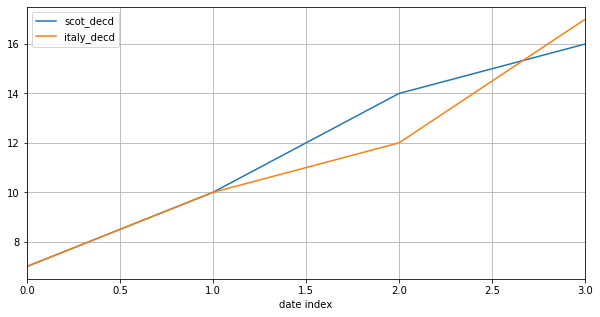

In [168]:
#plot our number of deaths for Scotland and Italy
df_merged.plot(x='date index', y=['scot_decd', 'italy_decd'], figsize=(10,5), grid=True)


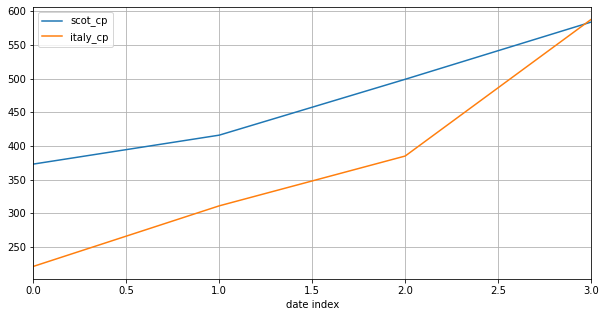

In [169]:
#plot our number of Confirmed Positive cases for Scotland and Italy

df_merged.plot(x='date index', y=['scot_cp', 'italy_cp'], figsize=(10,5), grid=True)



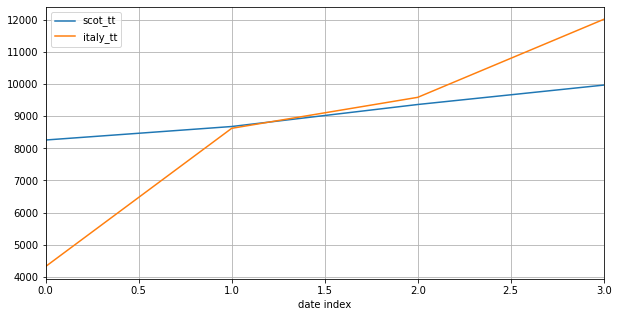

In [170]:
#plot our Total number of Tests administered for Scotland and Italy
df_merged.plot(x='date index', y=['scot_tt', 'italy_tt'], figsize=(10,5), grid=True)

